# Heat Equation - FD

## Finite-difference scheme for the one-dimensional heat equation

We consider here the heat equation on [0, x] × [0, ∞) with boundary conditions 
u(x, 0) = sin(2πx) for all x ∈ [0, x] and 
u(0, t) = u(x, t) = 0 for all t ≥ 0. 

We apply a finite difference scheme, explicit in time and with central difference in space

### Import packages

In [1]:
import numpy as np 
from matplotlib import pyplot, figure
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 10
from time import time

# For sparse matrices
from scipy.sparse import dia_matrix
from scipy.sparse.linalg.dsolve import spsolve

import warnings
warnings.filterwarnings("ignore")


## Explicit Scheme in time

#### Set Parameters

In [10]:
sigma = 1.0
barX = 1.0
T = 0.1


### No vector notation

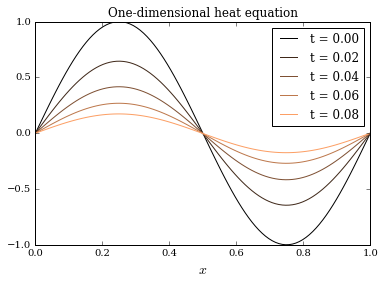

In [42]:
# Set up grid parameters
nx = 100  # num of grid points
nt = 5000 # num of time steps

dx = barX / (nx - 1)   # Grid step in space
dt = T / nt            # Grid step in time

# Space step size
x = np.linspace(0.0, barX, nx)

# Boundary conditions
u = np.sin(2 * np.pi * x)

# Double loop
for n in range(0, nt): # for each time step
    for j in range(1, nx - 1):  # for each point in grid
        u[j] += dt * (0.5 * sigma * sigma) * \
            (u[j - 1] - 2 * u[j] + u[j + 1]) / (dx**2)
            
    # Plot every pp time steps
    pp = 100
    if (n % pp == 0):
        if (n % (10 * pp) == 0):
            plotlabel = "t = %1.2f" % (n * dt)
            pyplot.plot(x, u, label=plotlabel, color=pyplot.get_cmap(
                    'copper')(float(n) / nt))

            
pyplot.xlabel(u'$x$', fontsize=14)
pyplot.title(u'One-dimensional heat equation')
pyplot.legend()
pyplot.show()


### Vector Notation

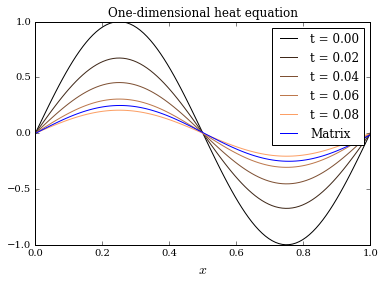

In [43]:
# Set up grid parameters
nx = 100  # num of grid points
nt = 5000 # num of time steps

dx = barX / (nx - 1)   # Grid step in space
dt = T / nt            # Grid step in time

# Space step size
x = np.linspace(0.0, barX, nx)
# Boundary conditions
x = np.linspace(0.0, barX, nx)
u = np.sin(2 * np.pi * x)
rhs = np.zeros(nx)

# Single loop
for n in range(0, nt): # for each time step
    rhs[1:-1] = dt * (0.5 * sigma * sigma) * \
            (u[:-2] - 2.0 * u[1:-1] + u[2:]) / (dx**2)
    u += rhs    
            
    # Plot every pp time steps
    pp = 100
    if (n % pp == 0):
        if (n % (10 * pp) == 0):
            plotlabel = "t = %1.2f" % (n * dt)
            pyplot.plot(x, u, label=plotlabel, color=pyplot.get_cmap(
                'copper')(float(n) / nt))

uMi = [spSolution[i] for i,xx in enumerate(xM) if i%10==0]  
pyplot.plot(x, uMi, label="Matrix", color='blue')   
pyplot.xlabel(u'$x$', fontsize=14)
pyplot.title(u'One-dimensional heat equation')
pyplot.legend()
pyplot.show()



### Matrix Notation

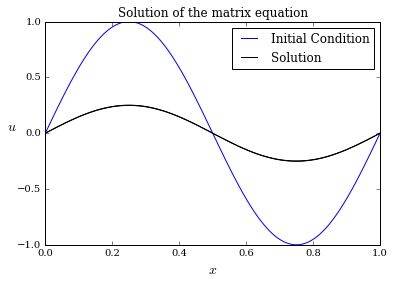

In [44]:
# Set up grid parameters
nx = 1000  # num of grid points
nt = 5000 # num of time steps

dx = barX / (nx - 1)   # Grid step in space
dt = T / nt            # Grid step in time

# Space step size
x = np.linspace(0.0, barX, nx)
# Boundary conditions
x = np.linspace(0.0, barX, nx)
u = np.sin(2 * np.pi * x)
rhs = np.zeros(nx)

# Definition of the tridiagonal matrix
Tmatrix = [np.ones(nx), 2 *np.ones(nx), np.ones(nx)]
nonzeropositions = np.array([-1, 0, 1])
iterationMatrix = dia_matrix((Tmatrix, nonzeropositions), shape=(nx, nx))

# Solving the linear system
spSolution = spsolve(iterationMatrix, u)

# Initial Condition plot
pyplot.figure()
pyplot.plot(x, u, 'b-', label='Initial Condition')
pyplot.plot(x, spSolution, 'k-', label='Solution')
pyplot.title('Solution of the matrix equation')
pyplot.xlabel(u'$x$', fontsize=14)
pyplot.ylabel(u'$u$', fontsize=14, rotation=0)
pyplot.legend()
pyplot.show()


### Matrix notations, using sparse matrices 

Computation time using sparse library: 0.0020465850830078125 seconds
Computation time using standard linear algebra: 0.02395462989807129 seconds


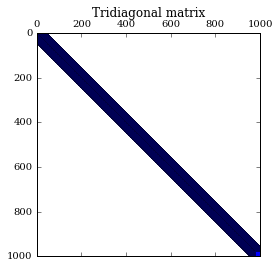

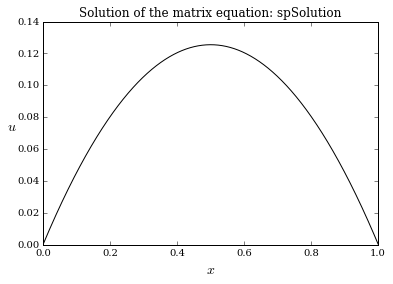

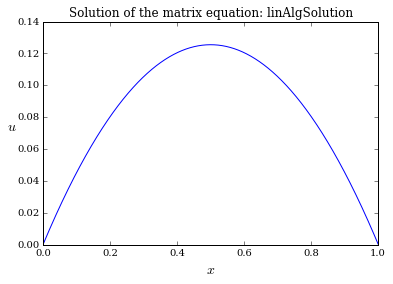

In [45]:

N = 1000
# Size of the matrix
dx = 1. / (N - 1)
# Space step size
x = np.linspace(0.0, 1.0, N)

# Definition of the tridiagonal matrix
Tmatrix = [np.ones(N), -2 * np.ones(N), np.ones(N)]
nonzeropositions = np.array([-1, 0, 1])
iterationMatrix = dia_matrix((Tmatrix, nonzeropositions), shape=(N, N))

# Schematic representation of the diagonal matrix
pyplot.figure()
pyplot.spy(iterationMatrix)
pyplot.title('Tridiagonal matrix')
pyplot.draw()

rhs = -np.ones(N) * dx * dx # Right-hand side

# Solving the linear system
t = time()
spSolution = spsolve(iterationMatrix, rhs)
comptime = time() - t
print("Computation time using sparse library: %s seconds" % comptime)

# In order to compare with the full resolution
fullIterMatrix = iterationMatrix.todense()
t = time()
linAlgSolution = np.linalg.solve(fullIterMatrix, rhs)
comptime = time() - t
print("Computation time using standard linear algebra: %s seconds" % comptime)

# Solution plot: spSolution
pyplot.figure()
pyplot.plot(x, spSolution, 'k-')
pyplot.title('Solution of the matrix equation: spSolution')
pyplot.xlabel(u'$x$', fontsize=14)
pyplot.ylabel(u'$u$', fontsize=14, rotation=0)
pyplot.show()

# Solution plot
pyplot.figure()
pyplot.plot(x, linAlgSolution, 'b-')
pyplot.title('Solution of the matrix equation: linAlgSolution')
pyplot.xlabel(u'$x$', fontsize=14)
pyplot.ylabel(u'$u$', fontsize=14, rotation=0)
pyplot.show()
